Importing The Libraries I want to Work with on this Project

In [1]:
# -------------------
# 1. IMPORT LIBRARIES
# -------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

Loading the Dataset, this dataset was gotten from kaggle
https://www.kaggle.com/c/house-prices-advanced-regression-techniques:

The goal of this project is to build a regression model that can predict the sale price of houses in Ames using various housing attributes.


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Ames housing data/train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data Inspection and exploratory Data Analysis (checking for Corrolations with the Target Column)

In [7]:
# ------------------
# 3. DATA INSPECTION AND EXPLORATORY DATA ANALYSIS
# ------------------
print("Dataset shape:", df.shape)

# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0].head(20)


Dataset shape: (1460, 81)


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


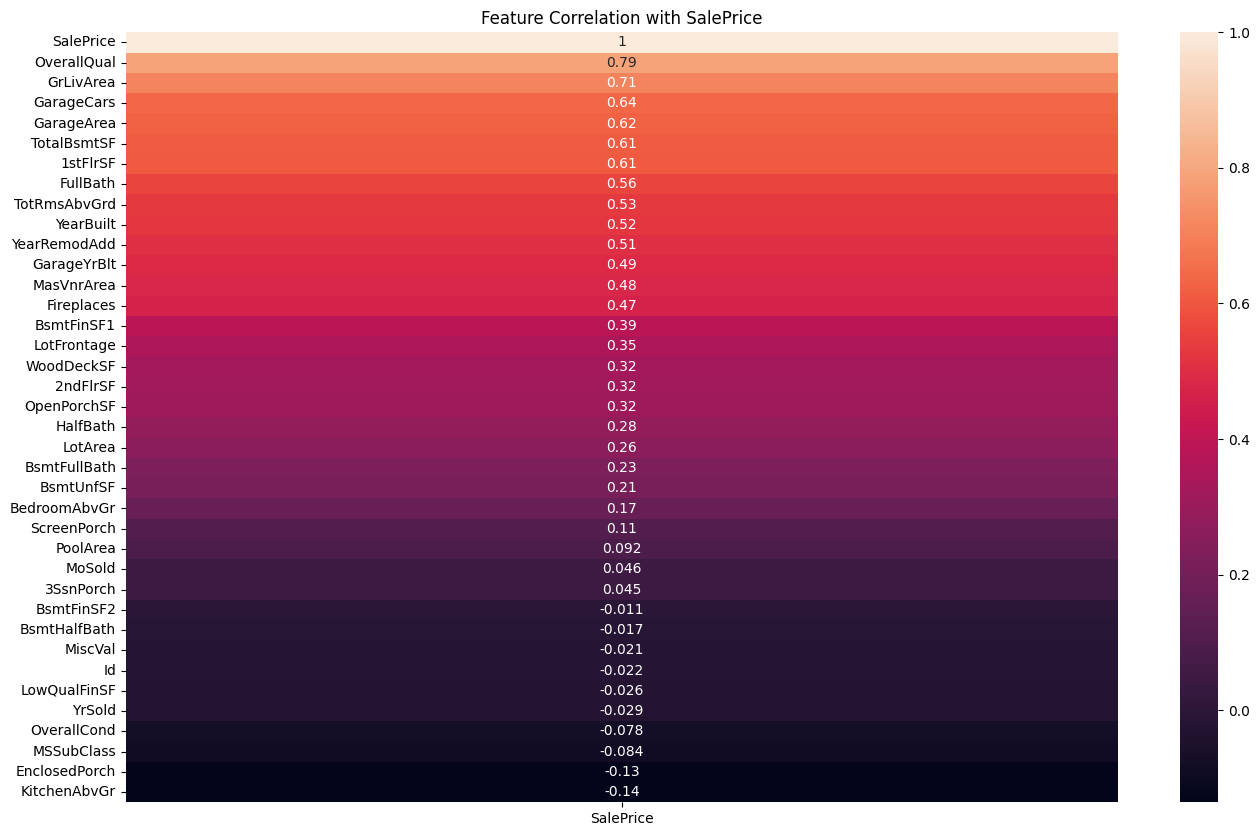

In [8]:
# Correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True)[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)
plt.title('Feature Correlation with SalePrice')
plt.show()

Feature Engineering

In [10]:
# -------------------------
# 4. FEATURE ENGINEERING
# -------------------------
y = df['SalePrice']
X = df.drop(['SalePrice', 'Id'], axis=1)

# Separate by type
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns


Data Preprocessing

In [12]:
# --------------------
# 5. DATA PREPROCESSING
# --------------------
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])